# pca

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle


from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
#path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training\emoji_sampling'  
#path_ = r'C:\Users\e2414\OneDrive\桌面\專題\AllData\training\20group'   

path_ = r'E:\專題\AllData\training\final_training'
path_model = r'E:\專題\AllData\training\training\clf_model' # pca模型匯到哪裡去

In [3]:
%%time
#data = pd.read_excel(path_ + r"\all_emo600.xlsx")
#data = data.drop("Unnamed: 0", axis = 1)

data = pd.read_pickle(path_+ '/X_train.pkl')
data = np.array(data)
np.shape(data)

Wall time: 1min 29s


(745961, 300)

### 開始
https://kknews.cc/zh-tw/code/kvzpj5b.html

In [4]:
%%time
pca = PCA(n_components=100)
pca.fit(data)

Wall time: 37.7 s


PCA(n_components=100)

In [5]:
#sum(pca.explained_variance_ratio_)

var = pca.explained_variance_  #eigenvalue
var_ratio = pca.explained_variance_ratio_   #這個主成分解釋了多少變異
#print(var)
#print(var_ratio)

cs_var = np.cumsum(var_ratio)

Text(0, 0.5, 'eigenvalue')

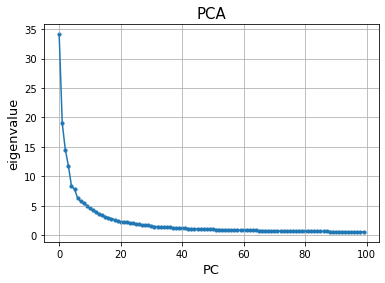

In [6]:
plt.plot(np.arange(len(var)) , var)
plt.scatter(np.arange(len(var)) , var, s = 10)   
plt.grid(True)

plt.title('PCA', fontsize=15)
plt.xlabel("PC", fontsize= 13)
plt.ylabel("eigenvalue", fontsize= 13)

#### 取幾個主成分 
可解釋 xx 的變異 

In [18]:
print(cs_var[5-1])
print(cs_var[7-1])
print(cs_var[10-1])
print(cs_var[20-1])
print(cs_var[40-1])
print(cs_var[60-1])
print(cs_var[100-1])

0.29020932574443903
0.3367876338050567
0.3899976346416448
0.5004422176907527
0.6093826077257006
0.674376123328531
0.7624438876366031


#### 重新做一次 同時返回降維後的數據

In [17]:
n = 20
np.shape(data)

(745961, 300)

In [10]:
pca = PCA(n_components=n)
newdata = pca.fit_transform(data)

In [19]:
newdata = pd.DataFrame(newdata)
np.shape(newdata)

(745961, 20)

In [12]:
path_pca = r'E:\專題\AllData\training\final_training\PCA'

In [13]:
newdata.to_pickle(path_pca + f'\\X_train_total_pc{n}.pkl')

### test 要另外根據 train 再轉換成100維

In [20]:
##
testdata = pd.read_pickle(path_+ '\X_test.pkl')
testdata.shape

(10000, 300)

In [21]:
test_pca = pca.transform(testdata)
test_pca.shape
test_pca = pd.DataFrame(test_pca)
test_pca.to_pickle(path_pca + f'\\X_test_sampling_pc{n}.pkl')

In [22]:
test_pca.shape

(10000, 20)

<hr>

### 匯出訓練好的 pca model

In [78]:
with open(path_model+ f'\\pca{n}.pkl','wb') as f:
    pickle.dump(pca, f)
    
print(f"成功匯出 pca{n}.pkl ")  

成功匯出 pca20.pkl 


### 當模型訓練好後，對於新輸入的數據，都可以用 transform 方法來降維


In [80]:
with open(path_model+ r"\pca20.pkl", "rb") as f:
    pca20 = pickle.load(f)

In [ ]:
pca20.tranform(X)